In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import time
import os
import sys
import json

import scipy as sp
from scipy import signal

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import os, warnings, random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers, Sequential, Model
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
SEED = 13
tf.random.set_seed(SEED)

In [3]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  X = np.zeros((len(df[name]),1))
  Y = np.zeros((len(df[name]),1))
  for i in range (len(percent)):
    phi = percent[i] * 2 * math.pi / 100
    X[i] = math.cos(phi)
    Y[i] = math.sin(phi)
  df['X'] = X
  df['Y'] = Y

In [4]:


def convert_data(d_x, d_y, look_back = 1, fore_cast = 1):
    dataX = []
    dataY = []

    for i in range(look_back, len(d_x) - fore_cast):
        dataX.append(d_x[i - look_back: i])
        dataY.append(d_y[i + fore_cast,:])

    return np.array(dataX), np.array(dataY)

In [5]:
#from google.colab import drive

#drive.mount('/content/drive')
#path =path = '/content/drive/MyDrive/nmchr_lab/Subjects/inclined/new/right_based/'


In [6]:
working_dir = os.getcwd()#os.path.dirname(os.getcwd())
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\Incline\\right_based\\"}
excel_path_name = excel_path_dict[sys_platform]

directory_path = working_dir 
print(directory_path)
excel_path = directory_path + excel_path_name


c:\Users\Admin\Desktop\Neurorobotic Lab\Data_Code\Model\Gait_Phase_Prediction


In [7]:
# ---------------------------------------------------- #
#  -> Provide Number of Trainning Subj and Test Subj.  #
#  -> List all the file name per each subj.            #
# ---------------------------------------------------- #

no_subj_train = 4
no_subj_test  = 1

sub1_file = ['TH\TH_4_I_r.xlsx', 'TH\TH_2_I_r.xlsx', 'TH\TH_3_I_r.xlsx']
sub2_file = ['JJ\JJ_4_I_r.xlsx', 'JJ\JJ_6_I_r.xlsx', 'JJ\JJ_7_I_r.xlsx']
sub3_file = ['SD\SD_1_I_r.xls', 'SD\SD_4_I_r.xls', 'SD\SD_2_I_r.xls', 'SD\SD_3_I_r.xls', 'SD\SD_5_I_r.xls']
sub4_file = ['PK\PK_0_I_r.xls', 'PK\PK_5_I_r.xls', 'PK\PK_2_I_r.xls', 'PK\PK_3_I_r.xls']
sub5_file = ['SKS\SKS_0_I_r.xls', 'SKS\SKS_4_I_r.xls', 'SKS\SKS_2_I_r.xls', 'SKS\SKS_3_I_r.xls', 'SKS\SKS_5_I_r.xls']
sub6_file = ['SOE\SOE_I_0.xlsx', 'SOE\SOE_I_2.xlsx', 'SOE\SOE_I_3.xlsx', 'SOE\SOE_I_4.xlsx', 'SOE\SOE_I_5.xlsx']
sub7_file = ['VP\VP_I_0.xlsx', 'VP\VP_I_2.xlsx', 'VP\VP_I_3.xlsx', 'VP\VP_I_5.xlsx']


In [8]:
#file_name = ['SKS_2_I_r.xlsx',  'SKS_3_I_r.xlsx',  'SKS_4_I_r.xlsx','SKS_5_I_r.xlsx', 'SD_2_I_r.xlsx',  'SD_3_I_r.xlsx',  'SD_4_I_r.xlsx','SD_5_I_r.xlsx', 'SD_1_I_r.xlsx', 'PK_0_I_r.xls', 'PK_2_I_r.xls', 'PK_3_I_r.xls','PK_5_I_r.xls']
# file_name = ['PK_0_I_r.xls', 'PK_2_I_r.xls', 'PK_3_I_r.xls','PK_5_I_r.xls']
# file_name = ['TH_4_I_r.xlsx', 'TH_3_I_r.xlsx', 'TH_2_I_r.xlsx']
# file_name = ['JJ_4_I_r.xlsx', 'JJ_6_I_r.xlsx', 'JJ_7_I_r.xlsx']
# file_name = ['SKS_2_I_r.xlsx',  'SKS_3_I_r.xlsx',  'SKS_4_I_r.xlsx','SKS_5_I_r.xlsx', 'SKS_0_I_r.xlsx'];
# file_name = ['SD_2_I_r.xlsx',  'SD_3_I_r.xlsx',  'SD_4_I_r.xlsx','SD_5_I_r.xlsx', 'SD_1_I_r.xlsx']
# file_name = ['SD_1_I_r.xlsx', 'SD_2_I_r.xlsx', 'SD_3_I_r.xlsx','SD_5_I_r.xlsx','SD_4_I_r.xlsx', 'SKS_2_I_r.xlsx',  'SKS_3_I_r.xlsx',  'SKS_4_I_r.xlsx','SKS_5_I_r.xlsx', 'TH_4_I_r.xlsx', 'TH_3_I_r.xlsx', 'TH_2_I_r.xlsx', 'SKS_2_I_r.xlsx','JJ_4_I_r.xlsx', 'JJ_6_I_r.xlsx', 'JJ_7_I_r.xlsx']

#file_list=[]

#for i in range (len(file_name)):
#    file_list.append(pd.read_excel(path+ file_name[i], sheet_name='Sheet1'))

#import random
#random.shuffle(file_list)

#all_data = pd.concat(file_list, axis=0, ignore_index=True)


In [70]:
# ---------------------------------------------------- #
#  -> Concat all Subj into a list                      #
#  -> Randomly shuffle the subj list                   #
# ---------------------------------------------------- #

#list1 = [sub1_file, sub2_file, sub3_file, sub4_file, sub5_file]
list1 = [sub5_file, sub6_file, sub7_file, sub3_file, sub4_file]
print("Number of all subject: ", len(list1))

import random
random.shuffle(list1)

Number of all subject:  5


In [71]:
# ---------------------------------------------------- #
#  -> Randomly choose (n) number Subj for testing by   #
#      poping an element from the list                 #
# ---------------------------------------------------- #

test_sub = list1.pop()

print("Test Subj: ", test_sub)

Test Subj:  ['SKS\\SKS_0_I_r.xls', 'SKS\\SKS_4_I_r.xls', 'SKS\\SKS_2_I_r.xls', 'SKS\\SKS_3_I_r.xls', 'SKS\\SKS_5_I_r.xls']


In [72]:
file_list = []

for i in range (len(list1)):
    for j in range(len(list1[i])):
        file_list.append(pd.read_excel(excel_path + list1[i][j], sheet_name='Sheet1'))

In [73]:
random.shuffle(file_list)

all_data = pd.concat(file_list, axis = 0, ignore_index = True)

In [74]:
#file_name

In [75]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803238 entries, 0 to 803237
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   l_ph_hip      803238 non-null  float64
 1   l_ph_ank      803238 non-null  float64
 2   l_ph_fo       803238 non-null  float64
 3   r_ph_hip      803238 non-null  float64
 4   r_ph_ank      803238 non-null  float64
 5   r_ph_fo       803238 non-null  float64
 6   n_lgrf        803238 non-null  float64
 7   n_r_grf       803238 non-null  float64
 8   n_lcop        803238 non-null  float64
 9   n_rcop        803238 non-null  float64
 10  perc_new      803238 non-null  float64
 11  st_sw_phase   803238 non-null  int64  
 12  strike_frame  803238 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 79.7 MB


In [76]:
cycle = 0
cycle_list = []

start = 0

for i in range(len(all_data) - 1):
    if (all_data['perc_new'][i+1] == 0):
        cycle += 1
        cycle_list.append(all_data.iloc[start:i])
        start = i+1

random.shuffle(cycle_list)
source_table = pd.concat(cycle_list, axis=0, ignore_index=True)

source_table

,l_ph_hip,l_ph_ank,l_ph_fo,r_ph_hip,r_ph_ank,r_ph_fo,n_lgrf,n_r_grf,n_lcop,n_rcop,perc_new,st_sw_phase,strike_frame
0,0.484865,0.000000,280.379839,332.010540,0.000000,240.919628,0.057804,2.739097,0.000000,0.000000,0.000000,0,1
1,359.015774,0.000000,280.470177,330.082283,0.000000,238.237663,0.129445,2.722757,0.000000,0.000000,0.460829,0,2
2,357.386330,0.000000,280.816420,328.520849,0.000000,235.070332,0.226329,2.695043,0.000000,0.000000,0.921659,0,3
3,355.594313,0.000000,281.577480,327.319213,0.000000,231.284724,0.351683,2.654948,0.000000,0.000000,1.382488,0,4
4,353.640905,0.000000,283.097646,326.470790,0.000000,226.709359,0.507461,2.601536,0.000000,0.000000,1.843318,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799505,0.694630,0.758269,0.767228,0.932109,0.843790,0.136109,0.878002,0.000000,0.089612,0.001499,97.718631,0,258
799506,0.693517,0.756137,0.764659,0.933367,0.849906,0.110203,0.879757,0.000000,0.091121,0.002110,98.098859,0,259
799507,0.692117,0.754055,0.762243,0.934359,0.856242,0.068894,0.881320,0.000000,0.092584,0.002816,98.479087,0,260
799508,0.690404,0.751997,0.759939,0.935044,0.862730,0.008705,0.882663,0.016638,0.093996,0.003618,98.859316,0,261


In [77]:
drop_list = ["n_lgrf","n_r_grf","l_ph_ank","r_ph_ank"]

In [78]:
source_table = source_table.drop(drop_list, axis = 1)
source_table

,l_ph_hip,l_ph_fo,r_ph_hip,r_ph_fo,n_lcop,n_rcop,perc_new,st_sw_phase,strike_frame
0,0.484865,280.379839,332.010540,240.919628,0.000000,0.000000,0.000000,0,1
1,359.015774,280.470177,330.082283,238.237663,0.000000,0.000000,0.460829,0,2
2,357.386330,280.816420,328.520849,235.070332,0.000000,0.000000,0.921659,0,3
3,355.594313,281.577480,327.319213,231.284724,0.000000,0.000000,1.382488,0,4
4,353.640905,283.097646,326.470790,226.709359,0.000000,0.000000,1.843318,0,5
...,...,...,...,...,...,...,...,...,...
799505,0.694630,0.767228,0.932109,0.136109,0.089612,0.001499,97.718631,0,258
799506,0.693517,0.764659,0.933367,0.110203,0.091121,0.002110,98.098859,0,259
799507,0.692117,0.762243,0.934359,0.068894,0.092584,0.002816,98.479087,0,260
799508,0.690404,0.759939,0.935044,0.008705,0.093996,0.003618,98.859316,0,261


In [79]:
x = source_table
x = x.drop(['perc_new'], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

encode_gait_percentage(source_table, 'perc_new')
y = source_table[["X","Y"]]
y

data_x = x_scaled

In [80]:
data_y = y.values.reshape(-1,2)

In [81]:
type(data_y)

numpy.ndarray

In [82]:


#data_x,data_y= shuffle_multiple_datasets_based_on_gait_cycle( file_name, excel_path)

X_train, X_test,y_train, y_test = train_test_split(data_x, data_y ,
                        test_size=0.25,
                        shuffle=False)
look_back = 10
fore_cast = 1

train_x, train_y = convert_data(X_train, y_train, look_back, fore_cast)
validation_x, validation_y = convert_data(X_test, y_test, look_back, fore_cast)


In [83]:
print(train_x.shape)
print(train_y.shape)
print(validation_x.shape)
print(validation_y.shape)


(599621, 10, 8)
(599621, 2)
(199867, 10, 8)
(199867, 2)


In [84]:
train_x.shape

(599621, 10, 8)

In [85]:


n1=validation_x.shape[0]
val_x=validation_x[1:int(n1/10),:]
val_y=validation_y[1:int(n1/10),:]
print(val_x.shape)
print(val_y.shape)

(19985, 10, 8)
(19985, 2)


In [86]:
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        print(x.shape)
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [87]:
import tensorflow as tf
lr = 0.001
epochs = 30
batch = 128
n_features=train_x.shape[2]
seq_len = train_x.shape[1]
x=Input(shape=(seq_len, train_x.shape[2]))


l1=tf.keras.layers.AveragePooling1D(
    pool_size=2,
    strides=1)(x)
att1 = attention()(x)
rep_layer = L.RepeatVector((seq_len))(att1);

l2=L.Dense(n_features)(x)
print(l1.shape)
print(l2.shape)

inp=tf.concat([l1,rep_layer,l2],1)
print(inp.shape)
inp = L.MaxPooling1D(pool_size=2,strides=1)(inp)

# RNN_layer = SimpleRNN(hidden_units, return_sequences=True, activation=activation)(x)
LSTM_layer2 = LSTM(32, return_sequences=True)(inp)
# attn_layer1 = attention()(LSTM_layer2)
tmp_layer = L.Flatten()(LSTM_layer2)
lin_layer1= L.Dense(32)(tmp_layer)
lin_layer2 = L.Dense(2)(lin_layer1)
# rep_layer = L.RepeatVector((10))(attn_layer1)
# attn_layer2 = attention()(rep_layer)
# LSTM_layer3 = LSTM(32, return_sequences=True)(rep_layer)
# LSTM_layer4 = LSTM(64, return_sequences=True)(LSTM_layer3)
# lin_layer = L.TimeDistributed(L.Dense(n_features))(LSTM_layer4)
# tmp_layer = Flatten()(rep_layer)
# lin_layer = L.Dense(2)(tmp_layer)
model=Model(x,lin_layer2)
model.summary()
adam = optimizers.Adam(lr)
model.compile(loss='mse', optimizer=adam)

(None, 10, 8)
(None, 9, 8)
(None, 10, 8)
(None, 29, 8)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 8)]      0           []                               
                                                                                                  
 attention_1 (attention)        (None, 8)            18          ['input_2[0][0]']                
                                                                                                  
 average_pooling1d_1 (AveragePo  (None, 9, 8)        0           ['input_2[0][0]']                
 oling1D)                                                                                         
                                                                                                  
 repeat_vector_1 (RepeatVector)  (None, 10, 8)       0           ['attention_1[0][0]']      

In [88]:
model_history = model.fit( train_x, train_y, epochs=epochs, batch_size=batch,  verbose=1)

Epoch 1/30
(None, 10, 8)
(None, 10, 8)
4685/4685 [==============================] - 48s 10ms/step - loss: 0.0275
Epoch 2/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0119
Epoch 3/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0102
Epoch 4/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0088
Epoch 5/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0078
Epoch 6/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0073
Epoch 7/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0068
Epoch 8/30
4685/4685 [==============================] - 46s 10ms/step - loss: 0.0065
Epoch 9/30
4685/4685 [==============================] - 44s 9ms/step - loss: 0.0063
Epoch 10/30
4685/4685 [==============================] - 48s 10ms/step - loss: 0.0061
Epoch 11/30
4685/4685 [==============================] - 47s 10ms/step - loss: 0.0059
Epoch 12/30
4685/4685 [=============

In [89]:
#model.save(path+"cnn_new_model_all_sub_ex_th 2_leg_")

In [90]:
#model = tf.keras.models.load_model(path+"cnn_new_model_sd_sks_th")

In [91]:
def step_decay(epoch):
	initial_lrate = 0.001
	drop = 0.005
	epochs_drop = 10
	lrate=initial_lrate - 0.00001
	# lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate


In [92]:
# trainPredict = model.predict(train_x)
testPredict = model.predict(validation_x)

(None, 10, 8)
6246/6246 [==============================] - 16s 3ms/step


In [93]:

testPredict.shape

(199867, 2)

In [94]:
from sklearn.metrics import mean_squared_error

# trainScore = np.sqrt(mean_squared_error(train_y, trainPredict))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(validation_y, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.07 RMSE


In [95]:
v = X_test[11:]
v.shape

(199867, 8)

In [96]:

x_test = scaler.inverse_transform(v)

pred = np.zeros((len(testPredict),1))

for iter in range(len(testPredict)):
  x = testPredict[iter][0]
  y = testPredict[iter][1]
  pred[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))


  if ((pred[iter] >= 80) & (x_test[iter][-1] <= 20)) :
    pred[iter] = pred[iter] - 100
    
    if abs(pred[iter]) >= 5:
        pred[iter] = 0


  if ((pred[iter] <= 20) & (x_test[iter][-1] >= 150)):
     pred[iter] = 100 - pred[iter]
     if abs(pred[iter]) >= 5:
         pred[iter] = 100




  #if (pred[iter] > 100):
  #  pred[iter] = pred[iter] - 100

pred1=pd.DataFrame(pred).sort_index().reset_index()

In [97]:

#x_test = scaler.inverse_transform(v)

#pred = np.zeros((len(testPredict),1))

#for iter in range(len(testPredict)):
#  x = testPredict[iter][0]
#  y = testPredict[iter][1]
#  pred[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))


  # if ((pred[iter] >= 80) & (x_test[iter][-1] <= 20)) :
  #   pred[iter] = pred[iter] - 100
  #   if abs(pred[iter]) >= 5:
  #     pred[iter] = 0


  # if ((pred[iter] <= 20) & (x_test[iter][-1] >= 150)):
  #   pred[iter] = 100 - pred[iter]
  #   if abs(pred[iter]) >= 5:
  #       pred[iter] = 100




  # if (pred[iter] > 100):
  #  pred[iter] = pred[iter] - 100

#pred1=pd.DataFrame(pred).sort_index().reset_index()

In [98]:
actual = np.zeros((len(validation_y),1))

for iter in range(len(validation_y)):
  x =validation_y[iter][0]
  y =validation_y[iter][1]
  actual[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

In [99]:
correct = 0
for i in range(5):
  correct = 0
  for iter in range(len(actual)):
    #if (abs(actual[iter] - pred[iter]) <= (i+1)) or (actual[iter]>98) or(actual[iter]<3):
      #correct+=1
      if (abs(actual[iter] - pred[iter]) <= (i+1)):
        correct+=1

  print(correct)
  print(len(actual))

  print("Precision ", i+1, ": ", correct * 100/len(actual))

116211
199867
Precision  1 :  58.14416587030375
169942
199867
Precision  2 :  85.02754331630534
189258
199867
Precision  3 :  94.6919701601565
196012
199867
Precision  4 :  98.0712173595441
198172
199867
Precision  5 :  99.15193603746492


In [100]:
#correct = 0
#for i in range(5):
#  correct = 0
#  for iter in range(len(actual)):
#    if (abs(actual[iter] - pred[iter]) <= (i+1)) or (actual[iter]>98) or(actual[iter]<3):
#      correct+=1

#  print(correct)
#  print(len(actual))

#  print("Precision ", i+1, ": ", correct * 100/len(actual))

In [101]:
perc_rmse = np.sqrt(mean_squared_error(actual, pred))
print("Predicting Percentage RMSE: ", perc_rmse)

Predicting Percentage RMSE:  1.5568887661586301


In [102]:
rmse = 0
length = len(actual)
for i in range(len(actual)):

    rmse = rmse + pow(pred[i] - actual[i], 2)
rmse = rmse / length
rmse = math.sqrt(rmse)
print(length)
print(len(actual))
print(rmse)

199867
199867
1.5568887661586137


In [103]:
#rmse = 0
#length = len(actual)
#for i in range(len(actual)):
#  if abs (pred[i] - actual[i]) >= 90:
#    length -= 1
#  else:
#    rmse = rmse + pow(pred[i] - actual[i], 2)
#rmse = rmse / length
#rmse = math.sqrt(rmse)
#print(length)
#print(len(actual))
#print(rmse)

122147
199867


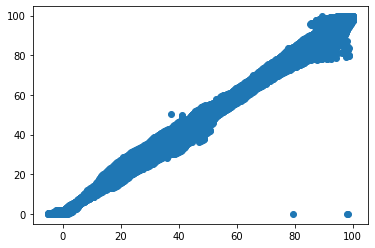

In [104]:
correct = 0

plt.figure()
plt.scatter(pred, actual)
for iter in range(len(actual)):
  if actual[iter]<5 or actual[iter]>95:
    correct+=1
    continue
  if (abs(actual[iter] - pred[iter]) <= 1):
    correct+=1


print(correct)
print(len(actual))

Text(0.5, 1.0, 'Actual vs Prediction')

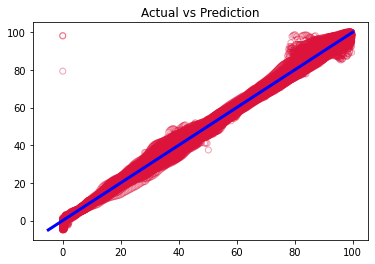

In [105]:
plt.scatter(actual, pred, facecolors='none', edgecolors='crimson',alpha=0.4)
p1 = max(max(pred), max(actual))
p2 = min(min(pred), min(actual))

ci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])

plt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)
plt.title('Actual vs Prediction')

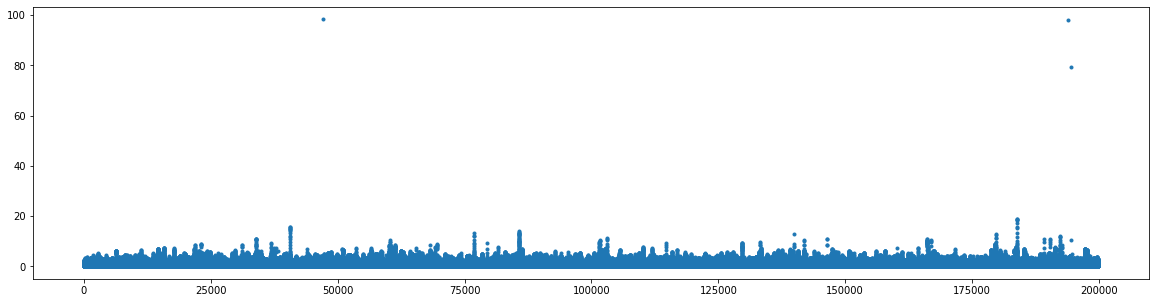

In [106]:
predfig=plt.figure(figsize=(20,5))
dif = abs(actual-pred)

plt.plot(dif,'.')

In [107]:
tf.keras.utils.plot_model(model, 'model_new.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


***TESTING ON OTHER SUBJECT***

In [108]:
test_file_list = []

for i in range(len(test_sub)):
    test_file_list.append(pd.read_excel(excel_path + test_sub[i], sheet_name='Sheet1'))

In [109]:
## if there are multiple subject to test:
# random.shuffle(test_file_list)

all_test = pd.concat(test_file_list, axis = 0, ignore_index = True)

In [110]:
all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295263 entries, 0 to 295262
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   l_ph_hip      295263 non-null  float64
 1   l_ph_ank      295263 non-null  float64
 2   l_ph_fo       295263 non-null  float64
 3   r_ph_hip      295263 non-null  float64
 4   r_ph_ank      295263 non-null  float64
 5   r_ph_fo       295263 non-null  float64
 6   n_lgrf        295263 non-null  float64
 7   n_r_grf       295263 non-null  float64
 8   n_lcop        295263 non-null  float64
 9   n_rcop        295263 non-null  float64
 10  perc_new      295263 non-null  float64
 11  st_sw_phase   295263 non-null  int64  
 12  strike_frame  295263 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 29.3 MB


In [111]:
cycle = 0
cycle_list = []

start = 0

for i in range(len(all_test) - 1):
    if (all_test['perc_new'][i+1] == 0):
        cycle += 1
        cycle_list.append(all_test.iloc[start:i])
        start = i+1

random.shuffle(cycle_list)
test_table = pd.concat(cycle_list, axis=0, ignore_index=True)

test_table

,l_ph_hip,l_ph_ank,l_ph_fo,r_ph_hip,r_ph_ank,r_ph_fo,n_lgrf,n_r_grf,n_lcop,n_rcop,perc_new,st_sw_phase,strike_frame
0,0.667644,0.745372,0.806413,0.981309,0.898270,0.714573,0.897445,0.036973,0.171359,0.009193,0.000000,0,1
1,0.652177,0.744517,0.797888,0.975148,0.879422,0.711622,0.893389,0.059517,0.171548,0.011271,0.512821,0,2
2,0.630887,0.743679,0.790980,0.968967,0.864716,0.708073,0.886241,0.087298,0.171481,0.013553,1.025641,0,3
3,0.600858,0.742849,0.785273,0.962779,0.853196,0.703749,0.875707,0.119944,0.171138,0.016028,1.538462,0,4
4,0.558940,0.742019,0.780471,0.956599,0.844110,0.698391,0.861492,0.156588,0.170495,0.018676,2.051282,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293675,0.739027,0.092401,0.160030,0.980535,0.079295,0.692459,0.772815,0.000000,0.148629,0.003479,97.570850,1,242
293676,0.736934,0.031373,0.154547,0.975209,0.051339,0.690302,0.772163,0.000000,0.149926,0.004767,97.975709,1,243
293677,0.734666,0.953588,0.148071,0.969941,0.021670,0.687477,0.771591,0.000000,0.151204,0.006242,98.380567,1,244
293678,0.732177,0.887606,0.140339,0.964742,0.992415,0.683853,0.770985,0.000000,0.152461,0.007912,98.785425,1,245


In [112]:
test_table = test_table.drop(drop_list, axis = 1)
test_table

,l_ph_hip,l_ph_fo,r_ph_hip,r_ph_fo,n_lcop,n_rcop,perc_new,st_sw_phase,strike_frame
0,0.667644,0.806413,0.981309,0.714573,0.171359,0.009193,0.000000,0,1
1,0.652177,0.797888,0.975148,0.711622,0.171548,0.011271,0.512821,0,2
2,0.630887,0.790980,0.968967,0.708073,0.171481,0.013553,1.025641,0,3
3,0.600858,0.785273,0.962779,0.703749,0.171138,0.016028,1.538462,0,4
4,0.558940,0.780471,0.956599,0.698391,0.170495,0.018676,2.051282,0,5
...,...,...,...,...,...,...,...,...,...
293675,0.739027,0.160030,0.980535,0.692459,0.148629,0.003479,97.570850,1,242
293676,0.736934,0.154547,0.975209,0.690302,0.149926,0.004767,97.975709,1,243
293677,0.734666,0.148071,0.969941,0.687477,0.151204,0.006242,98.380567,1,244
293678,0.732177,0.140339,0.964742,0.683853,0.152461,0.007912,98.785425,1,245


In [113]:
x_test = test_table
x_test = x_test.drop(['perc_new'], axis=1)
scaler2 = MinMaxScaler()
x_test_scaled = scaler2.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled)

encode_gait_percentage(test_table, 'perc_new')
y_test = test_table[["X","Y"]]
y_test

data_x_test = x_test_scaled

In [114]:
#data_y_test = y_test.values.reshape(-1, 2)
data_y_test = y_test.values

In [115]:
test_x, test_y = convert_data(data_x_test, data_y_test, look_back, fore_cast)

In [116]:
check_point = data_x_test[11:]
check_point.shape

(293669, 8)

In [117]:
crossPredict = model.predict(test_x)

9178/9178 [==============================] - 27s 3ms/step


In [118]:
score = np.sqrt(mean_squared_error(test_y, crossPredict))
print('Test Score: %.3f RMSE' % (score))

Test Score: 0.732 RMSE


In [143]:

check_point_test = scaler2.inverse_transform(check_point)

predict = np.zeros((len(crossPredict),1))

for iter in range(len(crossPredict)):
  x = crossPredict[iter][0]
  y = crossPredict[iter][1]
  predict[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))


  if ((predict[iter] >= 80) & (check_point_test[iter][-1] <= 20)) :
    predict[iter] = predict[iter] - 100
    
    #if abs(predict[iter]) >= 5:
    #    predict[iter] = 0


  if ((predict[iter] <= 20) & (check_point_test[iter][-1] >= 150)):
     predict[iter] = 100 - predict[iter]
     #if abs(predict[iter]) >= 5:
     #    predict[iter] = 100

In [144]:
actual2 = np.zeros((len(test_y),1))

for iter in range(len(test_y)):
  x = test_y[iter][0]
  y = test_y[iter][1]
  actual2[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

In [145]:
correct = 0
for i in range(5):
  correct = 0
  for iter in range(len(actual2)):
    #if (abs(actual[iter] - pred[iter]) <= (i+1)) or (actual[iter]>98) or(actual[iter]<3):
      #correct+=1
      if (abs(actual2[iter] - predict[iter]) <= (i+1)):
        correct+=1

  print(correct)
  print(len(actual2))

  print("Precision ", i+1, ": ", correct * 100/len(actual2))

14717
293669
Precision  1 :  5.011424426820672
31230
293669
Precision  2 :  10.634421746932771
41909
293669
Precision  3 :  14.270828722132741
49300
293669
Precision  4 :  16.787607816963998
56411
293669
Precision  5 :  19.209041471861177


In [146]:
perc_rmse_cross = np.sqrt(mean_squared_error(actual2, predict))
print("Predicting Percentage RMSE: ", perc_rmse_cross)

Predicting Percentage RMSE:  26.234385064831795


In [147]:
rmse = 0
length = len(actual2)
for i in range(len(actual2)):

    rmse = rmse + pow(predict[i] - actual2[i], 2)
rmse = rmse / length
rmse = math.sqrt(rmse)
print(length)
print(len(actual2))
print(rmse)

293669
293669
26.234385064831702


Text(0.5, 1.0, 'Actual vs Prediction')

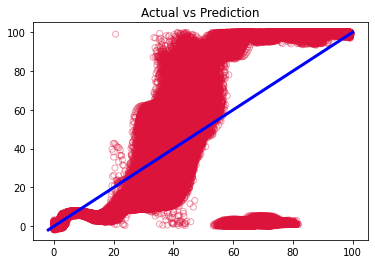

In [148]:
plt.scatter(actual2, predict, facecolors='none', edgecolors='crimson',alpha=0.4)
p1 = max(max(predict), max(actual2))
p2 = min(min(predict), min(actual2))

ci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])

plt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)
plt.title('Actual vs Prediction')

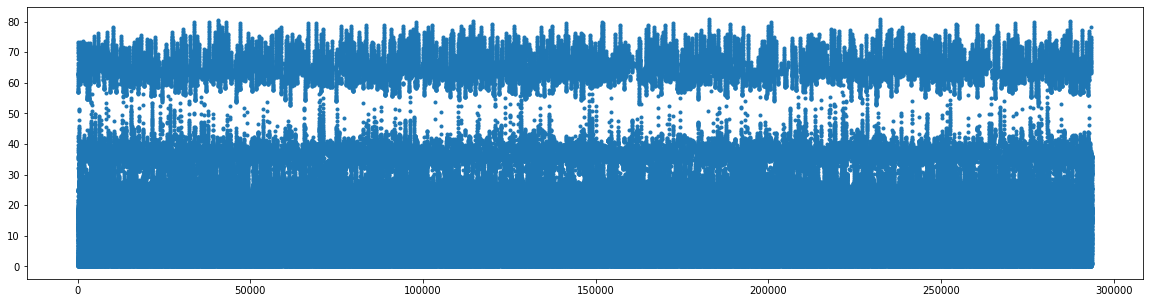

In [149]:
predfig=plt.figure(figsize=(20,5))
dif = abs(actual2-predict)

plt.plot(dif,'.')

In [150]:
"""file_name = ['PK_0_I_r.xls', 'PK_2_I_r.xls', 'PK_3_I_r.xls','PK_5_I_r.xls']


for i in range (len(file_name)):
    file_list.append(pd.read_excel(path+ file_name[i], sheet_name='Sheet1'))

import random
random.shuffle(file_list)

all_data = pd.concat(file_list, axis=0, ignore_index=True)

cycle = 0
cycle_list = []

start = 0

for i in range(len(all_data) - 1):
    if (all_data['perc'][i+1] == 0):
        cycle += 1
        cycle_list.append(all_data.iloc[start:i])
        start = i+1

random.shuffle(cycle_list)
source_table = pd.concat(cycle_list, axis=0, ignore_index=True)

source_table
source_table = source_table.drop(["n_lgrf","n_r_grf","l_ph_ank","r_ph_ank"], axis = 1)#,'l_ph_hip','l_ph_fo','n_lcop'], axis = 1)

x = source_table
x = x.drop(['perc'], axis=1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

encode_gait_percentage(source_table, 'perc')
y = source_table[["X","Y"]]
y

data_x = x_scaled
data_y = y.values.reshape(-1,2)
look_back=10
fore_cast=1
val_new_x, val_new_y = convert_data(data_x, data_y, look_back, fore_cast)"""


'file_name = [\'PK_0_I_r.xls\', \'PK_2_I_r.xls\', \'PK_3_I_r.xls\',\'PK_5_I_r.xls\']\n\n\nfor i in range (len(file_name)):\n    file_list.append(pd.read_excel(path+ file_name[i], sheet_name=\'Sheet1\'))\n\nimport random\nrandom.shuffle(file_list)\n\nall_data = pd.concat(file_list, axis=0, ignore_index=True)\n\ncycle = 0\ncycle_list = []\n\nstart = 0\n\nfor i in range(len(all_data) - 1):\n    if (all_data[\'perc\'][i+1] == 0):\n        cycle += 1\n        cycle_list.append(all_data.iloc[start:i])\n        start = i+1\n\nrandom.shuffle(cycle_list)\nsource_table = pd.concat(cycle_list, axis=0, ignore_index=True)\n\nsource_table\nsource_table = source_table.drop(["n_lgrf","n_r_grf","l_ph_ank","r_ph_ank"], axis = 1)#,\'l_ph_hip\',\'l_ph_fo\',\'n_lcop\'], axis = 1)\n\nx = source_table\nx = x.drop([\'perc\'], axis=1)\nscaler = MinMaxScaler()\nx_scaled = scaler.fit_transform(x)\nx_scaled = pd.DataFrame(x_scaled)\n\nencode_gait_percentage(source_table, \'perc\')\ny = source_table[["X","Y"]]\ny\

In [151]:
#testPredict = model.predict(val_new_x)

In [152]:
"""v = val_new_x[11:]
v.shape

pred = np.zeros((len(testPredict),1))

for iter in range(len(testPredict)):
  x = testPredict[iter][0]
  y = testPredict[iter][1]
  pred[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

  # pred1=pd.DataFrame(pred).sort_index().reset_index()

actual = np.zeros((len(val_new_y),1))

for iter in range(len(val_new_x)):
  x =val_new_y[iter][0]
  y =val_new_y[iter][1]
  actual[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))



correct = 0
for i in range(5):
  correct = 0
  for iter in range(len(actual)):
    if (abs(actual[iter] - pred[iter]) <= (i+1)) or (actual[iter]>98) or(actual[iter]<3):
      correct+=1

  print(correct)
  print(len(actual))

  print("Precision ", i+1, ": ", correct * 100/len(actual))"""

'v = val_new_x[11:]\nv.shape\n\npred = np.zeros((len(testPredict),1))\n\nfor iter in range(len(testPredict)):\n  x = testPredict[iter][0]\n  y = testPredict[iter][1]\n  pred[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))\n\n  # pred1=pd.DataFrame(pred).sort_index().reset_index()\n\nactual = np.zeros((len(val_new_y),1))\n\nfor iter in range(len(val_new_x)):\n  x =val_new_y[iter][0]\n  y =val_new_y[iter][1]\n  actual[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))\n\n\n\ncorrect = 0\nfor i in range(5):\n  correct = 0\n  for iter in range(len(actual)):\n    if (abs(actual[iter] - pred[iter]) <= (i+1)) or (actual[iter]>98) or(actual[iter]<3):\n      correct+=1\n\n  print(correct)\n  print(len(actual))\n\n  print("Precision ", i+1, ": ", correct * 100/len(actual))'

In [153]:
"""perc_rmse = np.sqrt(mean_squared_error(actual, pred))
print("Predicting Percentage RMSE: ", perc_rmse)
rmse = 0
length = len(actual)
for i in range(len(actual)):
  if abs (pred[i] - actual[i]) >= 90:
    length -= 1
  else:
    rmse = rmse + pow(pred[i] - actual[i], 2)
rmse = rmse / length
rmse = math.sqrt(rmse)
print(length)
print(len(actual))
print(rmse)"""

'perc_rmse = np.sqrt(mean_squared_error(actual, pred))\nprint("Predicting Percentage RMSE: ", perc_rmse)\nrmse = 0\nlength = len(actual)\nfor i in range(len(actual)):\n  if abs (pred[i] - actual[i]) >= 90:\n    length -= 1\n  else:\n    rmse = rmse + pow(pred[i] - actual[i], 2)\nrmse = rmse / length\nrmse = math.sqrt(rmse)\nprint(length)\nprint(len(actual))\nprint(rmse)'

In [154]:
"""plt.scatter(actual, pred, facecolors='none', edgecolors='crimson',alpha=0.4)
p1 = max(max(pred), max(actual))
p2 = min(min(pred), min(actual))

ci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])

plt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)
plt.title('Actual vs Prediction') """

"plt.scatter(actual, pred, facecolors='none', edgecolors='crimson',alpha=0.4)\np1 = max(max(pred), max(actual))\np2 = min(min(pred), min(actual))\n\nci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])\n\nplt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)\nplt.title('Actual vs Prediction') "